In [2]:
# Import matplotlib and matplotlib.pyplot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

print(f"matplotlib version: {matplotlib.__version__}")

matplotlib version: 3.3.4


In [3]:
import pandas as pd
import numpy as np

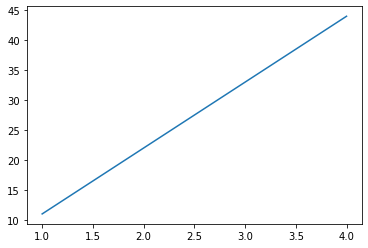

In [4]:
# Create some data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
# Now a y-value too!
plt.plot(x, y);

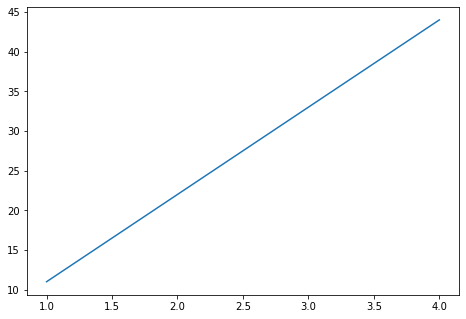

In [5]:
# Add some data to our previous plot 
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

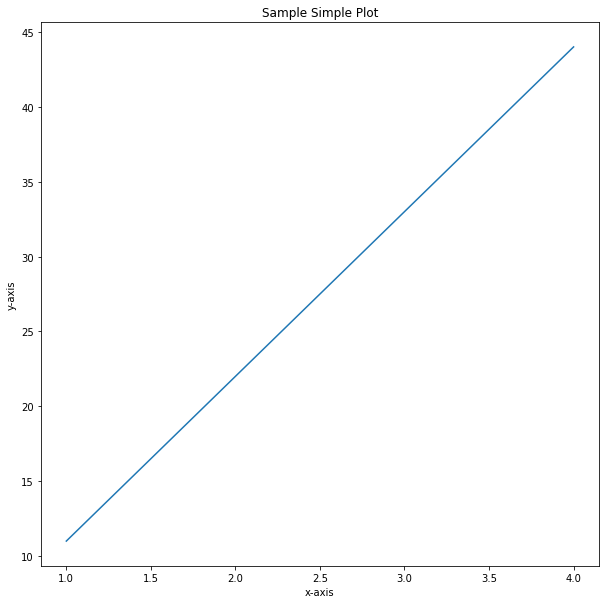

In [7]:
# A matplotlib workflow

# 0. Import and get matplotlib ready
# %matplotlib inline # Not necessary in newer versions of Jupyter (e.g. 2022 onwards)

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot (Figure and Axes)
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show
fig.savefig("simple-plot.png")

In [8]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

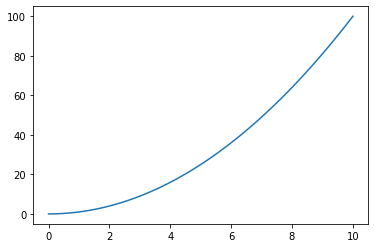

In [9]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**2);

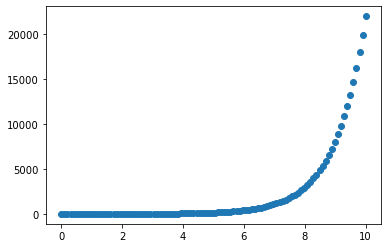

In [11]:
# Need to recreate our figure and axis instances when we want a new figure
# Creating a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

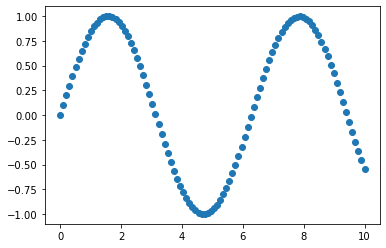

In [12]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

# Creating bar plots

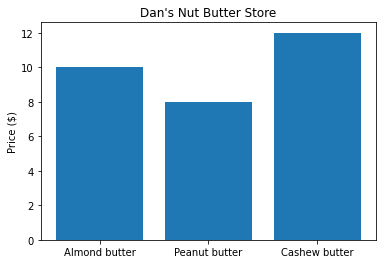

In [13]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

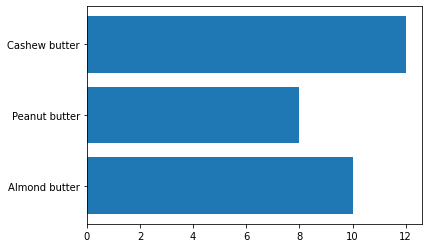

In [14]:

fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

# Creating a histogram plot

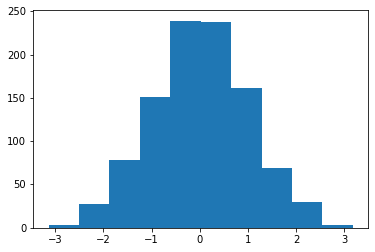

In [15]:
# Make some data from a normal distribution
x = np.random.randn(1000) # pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x);

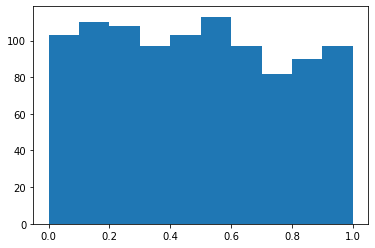

In [16]:
x = np.random.random(1000) # random data from random distribution

fig, ax = plt.subplots()
ax.hist(x);

# Creating Figures with multiple Axes with Subplots

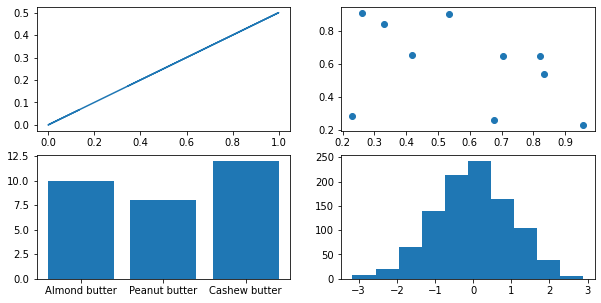

In [17]:
# Option 1: Create 4 subplots with each Axes having its own variable name
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

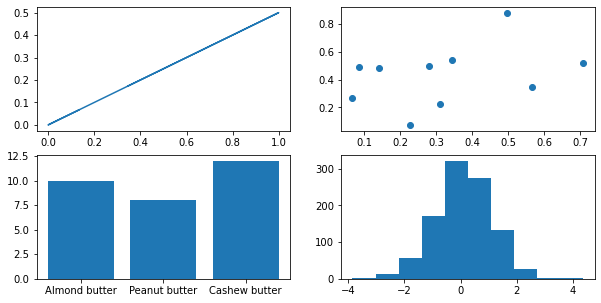

In [18]:
# Option 2: Create 4 subplots with a single ax variable
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index the ax variable to plot data
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

# Plotting data directly with pandas

In [19]:
# Let's import the car_sales dataset
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [20]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2024', periods=1000))

# Note: ts = short for time series (data over time)
ts

2024-01-01    1.277767
2024-01-02   -1.367016
2024-01-03    0.088694
2024-01-04    0.087821
2024-01-05   -0.199969
                ...   
2026-09-22    0.590808
2026-09-23   -0.860842
2026-09-24    0.137508
2026-09-25    0.516667
2026-09-26    0.574662
Freq: D, Length: 1000, dtype: float64

In [21]:
# Add up the values cumulatively
ts.cumsum()

2024-01-01     1.277767
2024-01-02    -0.089249
2024-01-03    -0.000554
2024-01-04     0.087267
2024-01-05    -0.112702
                ...    
2026-09-22    26.077279
2026-09-23    25.216437
2026-09-24    25.353946
2026-09-25    25.870612
2026-09-26    26.445274
Freq: D, Length: 1000, dtype: float64

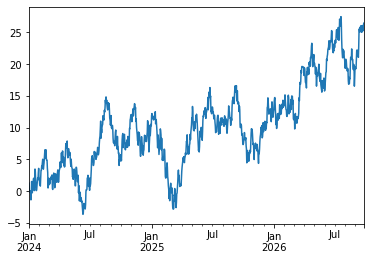

In [22]:
# Plot the values over time with a line plot (note: both of these will return the same thing)
# ts.cumsum().plot() # kind="line" is set by default
ts.cumsum().plot(kind="line");

In [25]:
# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', 
                                                    regex=True) # Tell pandas to replace using regex
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [26]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [27]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2024", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2024-01-01
1,Honda,Red,87899,4,5000,2024-01-02
2,Toyota,Blue,32549,3,7000,2024-01-03
3,BMW,Black,11179,5,22000,2024-01-04
4,Nissan,White,213095,4,3500,2024-01-05
5,Toyota,Green,99213,4,4500,2024-01-06
6,Honda,Blue,45698,4,7500,2024-01-07
7,Honda,Blue,54738,4,7000,2024-01-08
8,Toyota,White,60000,4,6250,2024-01-09
9,Nissan,White,31600,4,9700,2024-01-10


In [29]:
# Make total sales column (doesn't work, adds as string)
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


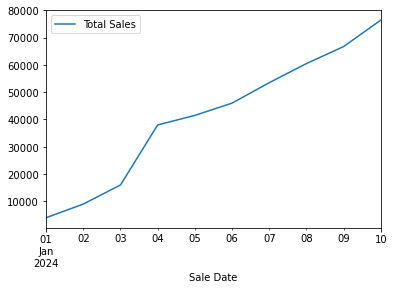

In [30]:
car_sales.plot(x='Sale Date', y='Total Sales');

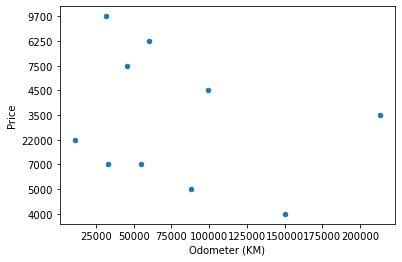

In [31]:
# Note: In previous versions of matplotlib and pandas, have the "Price" column as a string would
# return an error
car_sales["Price"] = car_sales["Price"].astype(str)

# Plot a scatter plot
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");